In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(CSOmapR)
    library(scater)
    library(logger)
    library(ComplexHeatmap)
    library(ggraph)
    library(tidygraph)

})

In [2]:
######################
# Smartseq2 CD45 All
######################
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_analysed.rds")
assay(sce, "tpm") <- calculateTPM(sce, rowData(sce)$Length)
tpmdata <- tpm(sce)
tpmdata <- as.data.frame(as.matrix(tpmdata))


#####
#perform CSOmap

log_info("CSOmap started ...")
TPM <- tpmdata
LR <- read.table('/raid1/zhangqiming/01Project_HCC/02Analysis/CSOmap/CSOmap.R/data/demo/LR_pairs.txt',
                 header = F)
colnames(LR) <- c('lignad','receptor','weight')
LR[,1:2] <- sapply(LR[,1:2], as.character)

In [3]:
coords_outdir = paste0("./out/CSOmapR", "/coordinates.txt")
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName

Rows: 9810 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]

# For Tumor

In [5]:
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]

## CSOmap signficance based on major cell type

In [39]:
log_info("Start P value")
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
log_info("Done")

[2021-09-08 17:17:27] identify topK
[2021-09-08 17:17:30] calculate detailed connections
[2021-09-08 17:17:34] calculate pvalues


In [40]:
saveRDS(signif_results, file = "./out/signif_results_CSOmap.rds")

## LR contributions based on major cell type

In [6]:
contribution_list = getContribution(TPM[, df_tumor$cellName], LR, signif_results$detailed_connections)
LRcontri_tumor <- bind_rows(lapply(names(contribution_list), function(clusterPair) {
    scores <- contribution_list[[clusterPair]]
    tibble(clusterPair, 
           LRPair = names(scores),
           scores = scores
          )
}
))


[2021-09-09 15:52:14] Extracting data matrix


ERROR: Error in paste0(list(...), collapse = ""): object 'signif_results' not found


## Write out tumor LR contribution output

In [54]:
readr::write_tsv(LRcontri_tumor, "./out/CSOmapR/LR_contribution_tumor_majorCellTypes.tsv")

In [2]:
LRcontri_tumor <- readr::read_tsv("./out/CSOmapR/LR_contribution_tumor_majorCellTypes.tsv")

Rows: 157686 Columns: 3

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): clusterPair, LRPair
dbl (1): scores


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
library(RColorBrewer)

In [23]:
168 + 88 + 48 + 138 + 188 + 118 + 108 + 98 + 188 + (3*58)

[1] 1316

In [9]:
0.84*0.84

[1] 0.7056

In [12]:
0.84 * 0.48

[1] 0.4032

In [10]:
0.84 * 0.48 * 0.84 * 0.48

[1] 0.1625702

In [20]:
(0.84 * 0.48  * 0.84 * 0.48) * 107

[1] 17.39502

In [14]:
17.12 / 3

[1] 5.706667

In [11]:

107 * 0.16

[1] 17.12

In [ ]:
matrixc(42.8, 17.12, )

In [7]:
LRcontri_tumor %>% 
    group_by(clusterPair) %>%  
    filter(grepl("Mesen", clusterPair)) %>% 
    filter(grepl("Hepatocyte", clusterPair)) %》% 
    F

clusterPair,LRPair,scores
<chr>,<chr>,<dbl>
Mesenchyme---Hepatocytes,TIMP1---CD63,0.676763491
Mesenchyme---Hepatocytes,FGB---ITGB1,0.040567941
Mesenchyme---Hepatocytes,FGG---ITGB1,0.035382265
Mesenchyme---Hepatocytes,HLA-B---CANX,0.019872842
Mesenchyme---Hepatocytes,FGA---ITGB1,0.017067763
Mesenchyme---Hepatocytes,AGT---AGTR1,0.013735073
Mesenchyme---Hepatocytes,LGALS3BP---ITGB1,0.013050511
Mesenchyme---Hepatocytes,SPP1---ITGB1,0.008676182
Mesenchyme---Hepatocytes,HLA-A---APLP2,0.008036306


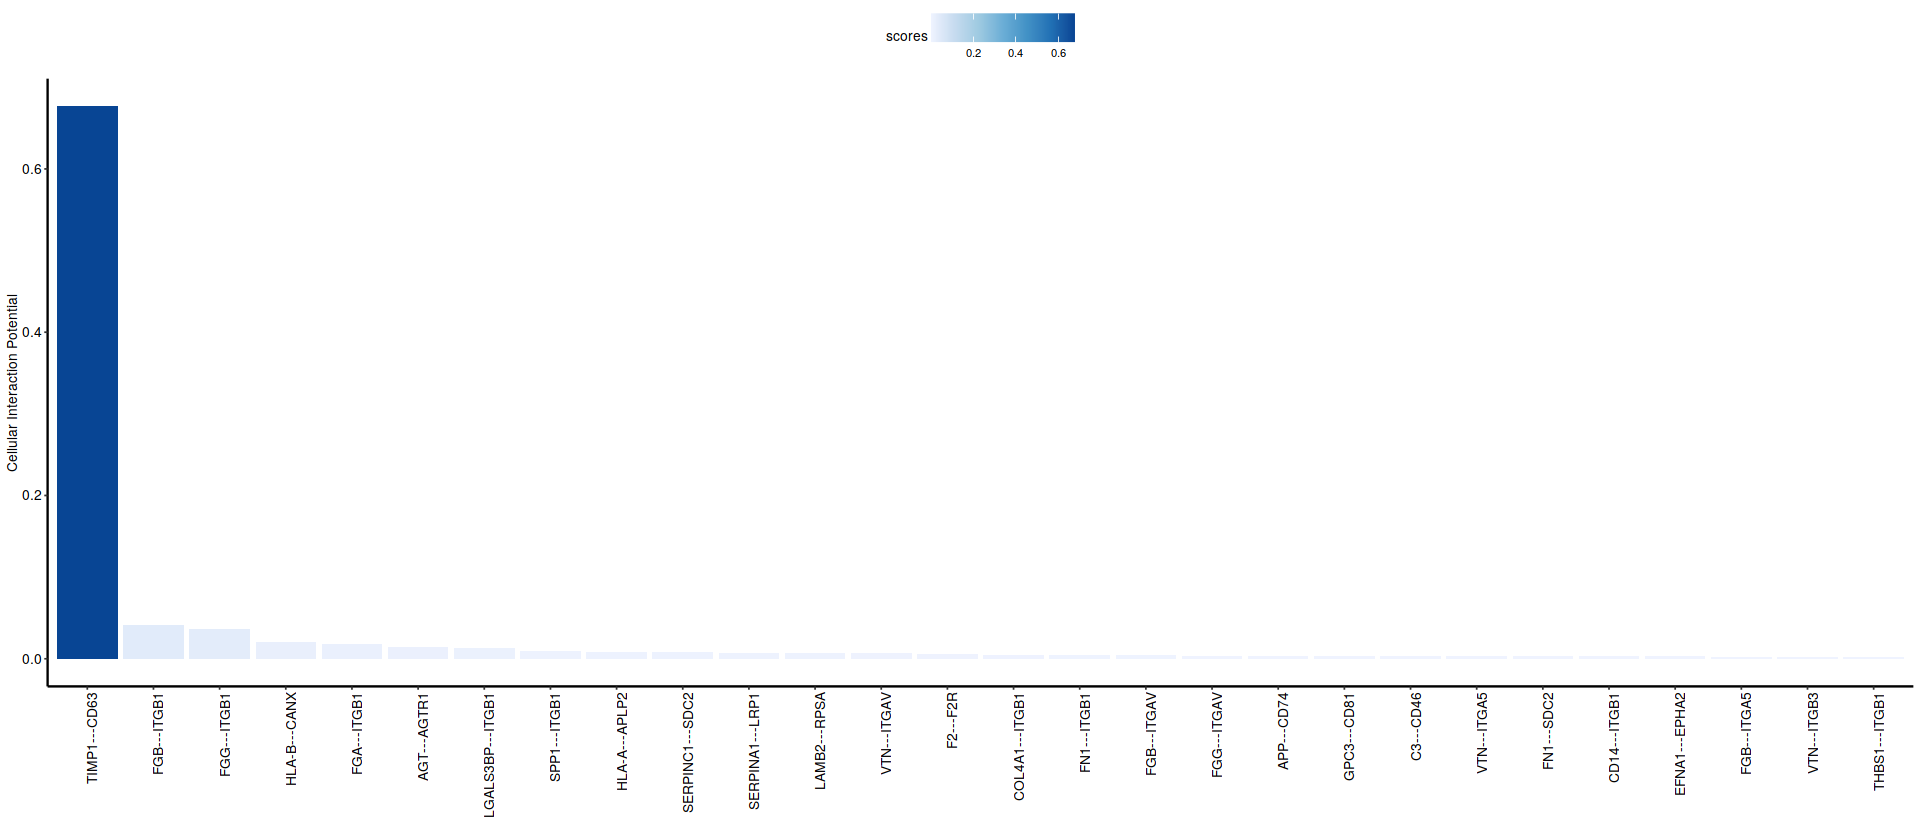

In [32]:
options(repr.plot.width = 16)
p <- LRcontri_tumor %>% 
    group_by(clusterPair) %>%  
    filter(grepl("Mesen", clusterPair)) %>% 
    filter(grepl("Hepatocyte", clusterPair)) %>%
    filter(scores > 0.002) %>% 
    ggplot(aes(x = reorder(LRPair, -scores), y = scores)) +
      geom_bar(aes(fill = scores), stat = 'identity') +
      scale_fill_distiller(palette = "Blues", direction = 1, guide = guide_colorbar) +
      ggpubr::theme_pubr(base_size = 8, x.text.angle = 90) +
      ylab("Cellular Interaction Potential") + xlab("")
p
ggsave(p, filename = "../figures/SupplementaryFigure4/S4A_barplot_CSOmap_mesenchymal_hepatocytes.pdf", width = 6, height = 3)

# Pertubation TIMP1

In [15]:
LRcontri_tumor %>% group_by(clusterPair) %>%  filter(grepl("Mesen", clusterPair)) %>% filter(grepl("Hepatocyte", clusterPair))

clusterPair,LRPair,scores
<chr>,<chr>,<dbl>
Mesenchyme---Hepatocytes,TIMP1---CD63,0.676763491
Mesenchyme---Hepatocytes,FGB---ITGB1,0.040567941
Mesenchyme---Hepatocytes,FGG---ITGB1,0.035382265
Mesenchyme---Hepatocytes,HLA-B---CANX,0.019872842
Mesenchyme---Hepatocytes,FGA---ITGB1,0.017067763
Mesenchyme---Hepatocytes,AGT---AGTR1,0.013735073
Mesenchyme---Hepatocytes,LGALS3BP---ITGB1,0.013050511
Mesenchyme---Hepatocytes,SPP1---ITGB1,0.008676182
Mesenchyme---Hepatocytes,HLA-A---APLP2,0.008036306


## Visualize Q value

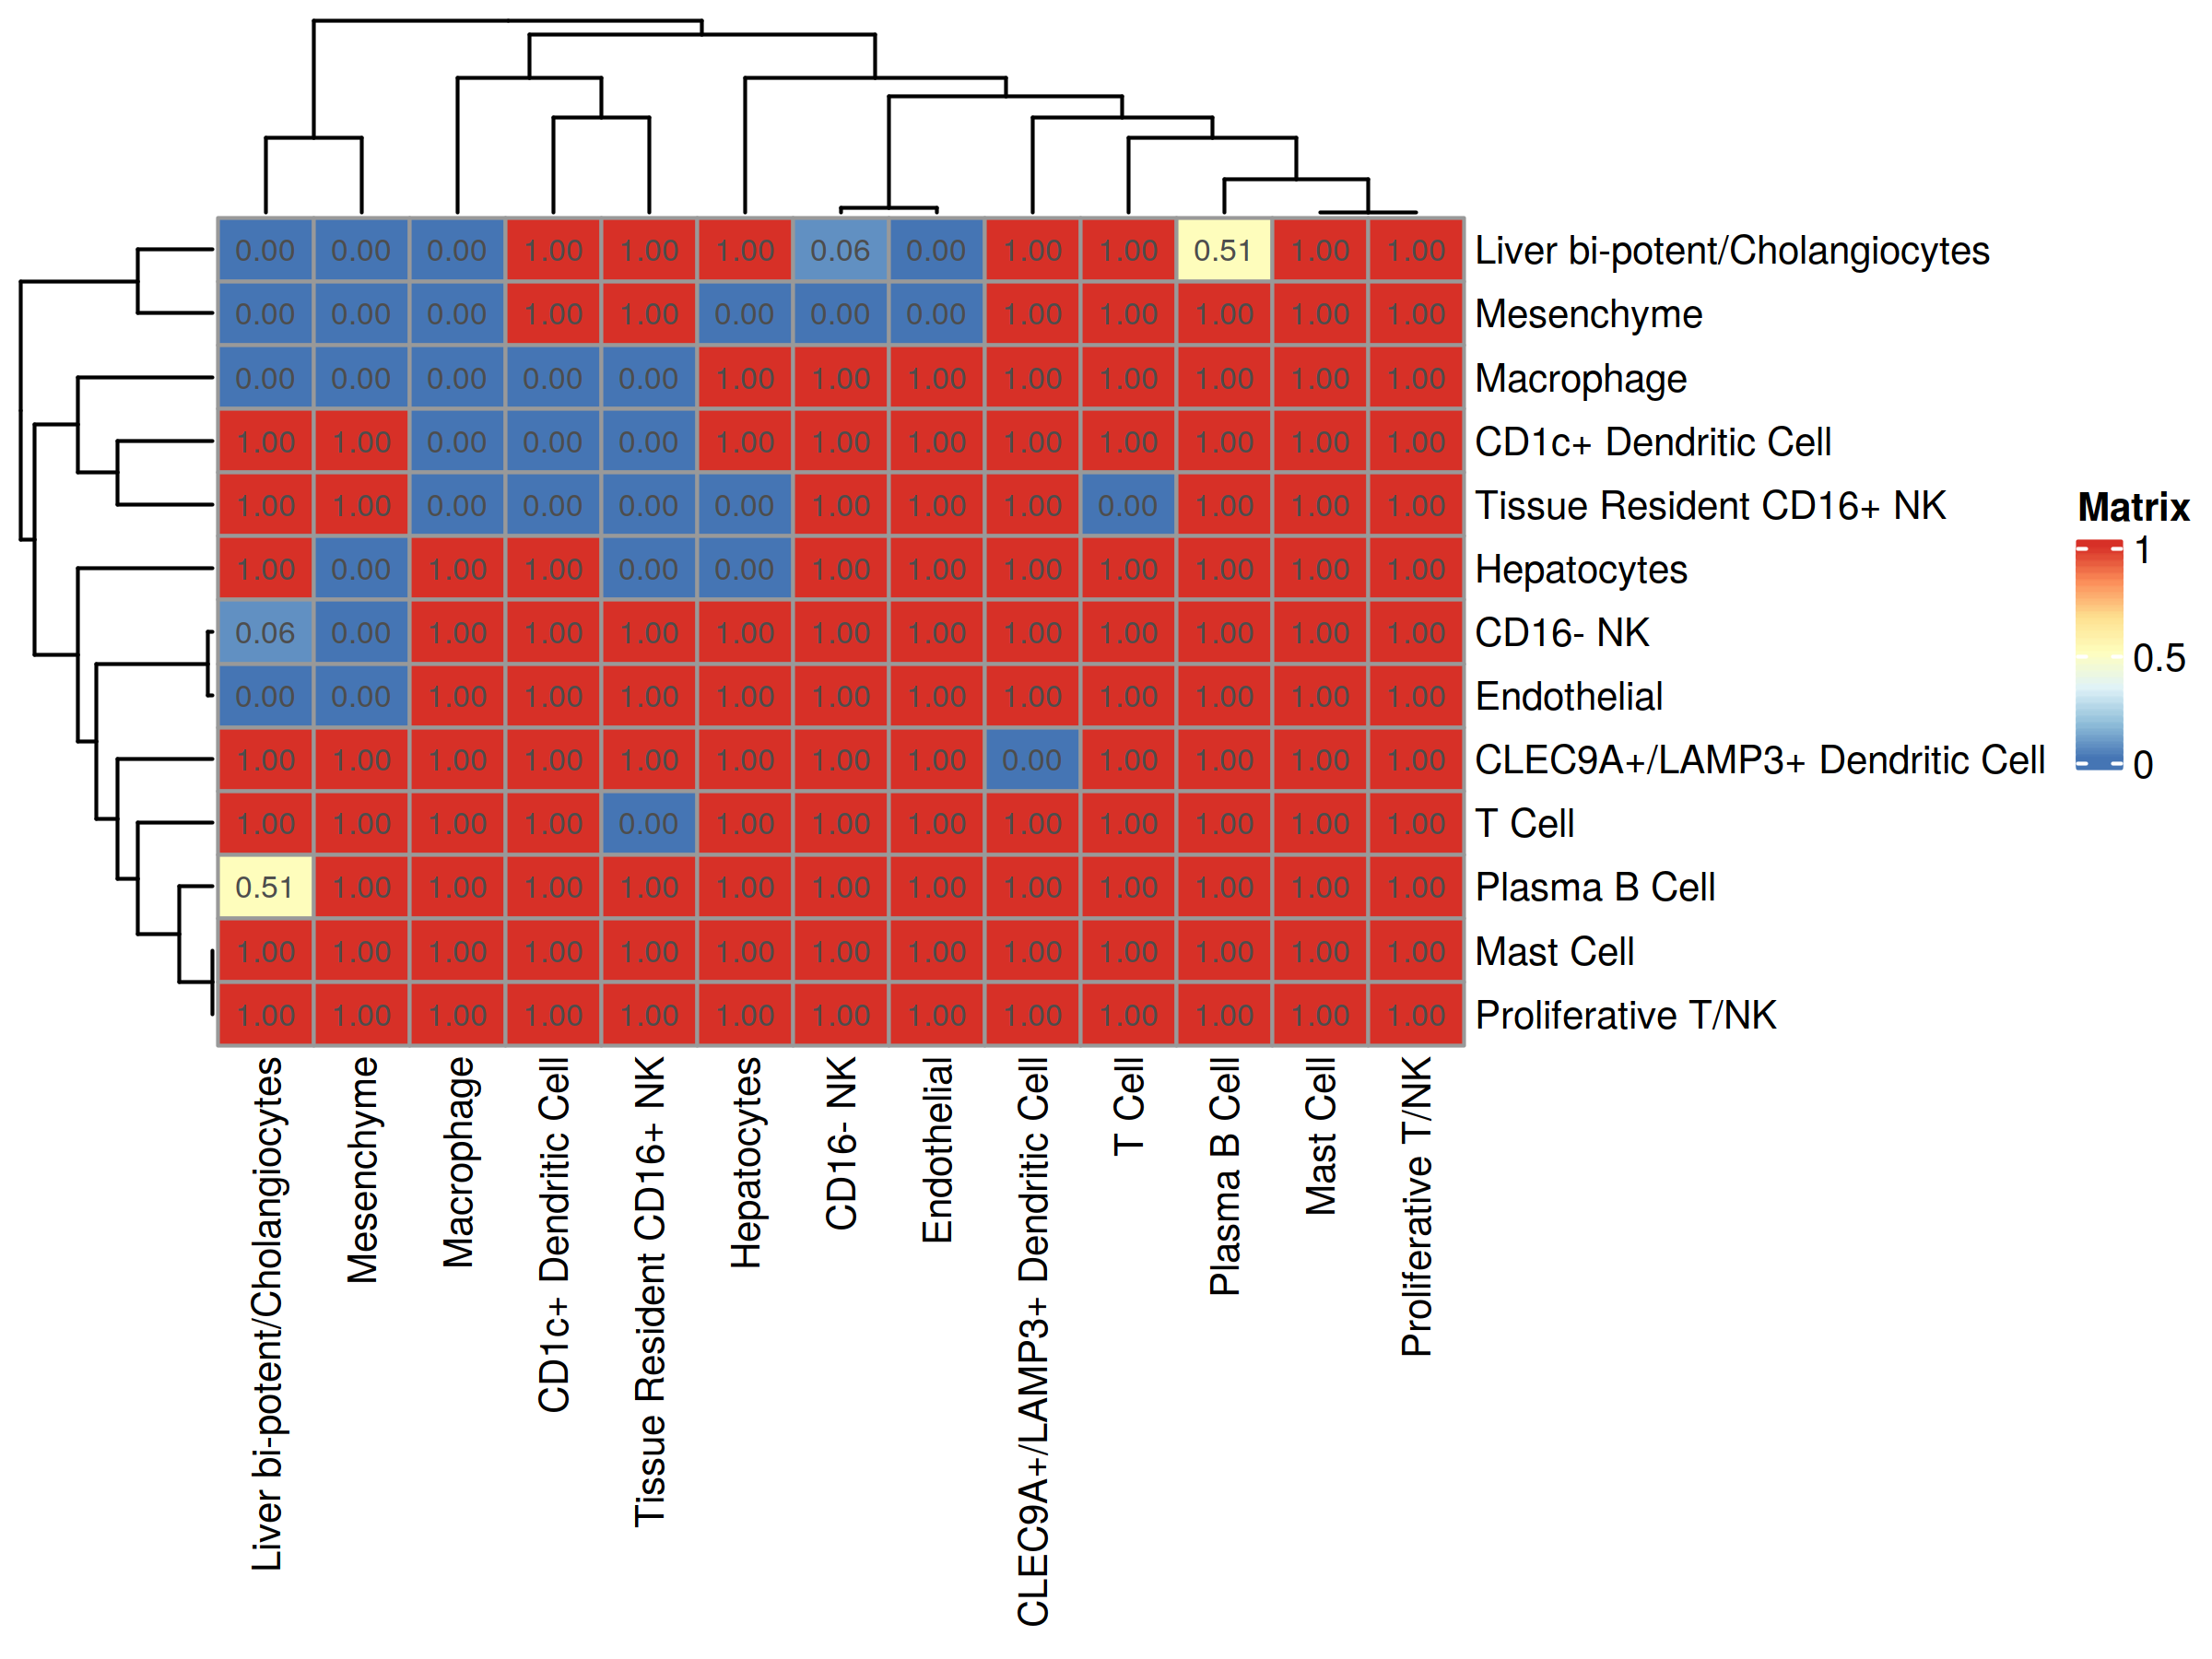

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
qvalue_tumor <- signif_results$qvalue
pheatmap(qvalue_tumor, display_numbers = T)

## Binarize q-value

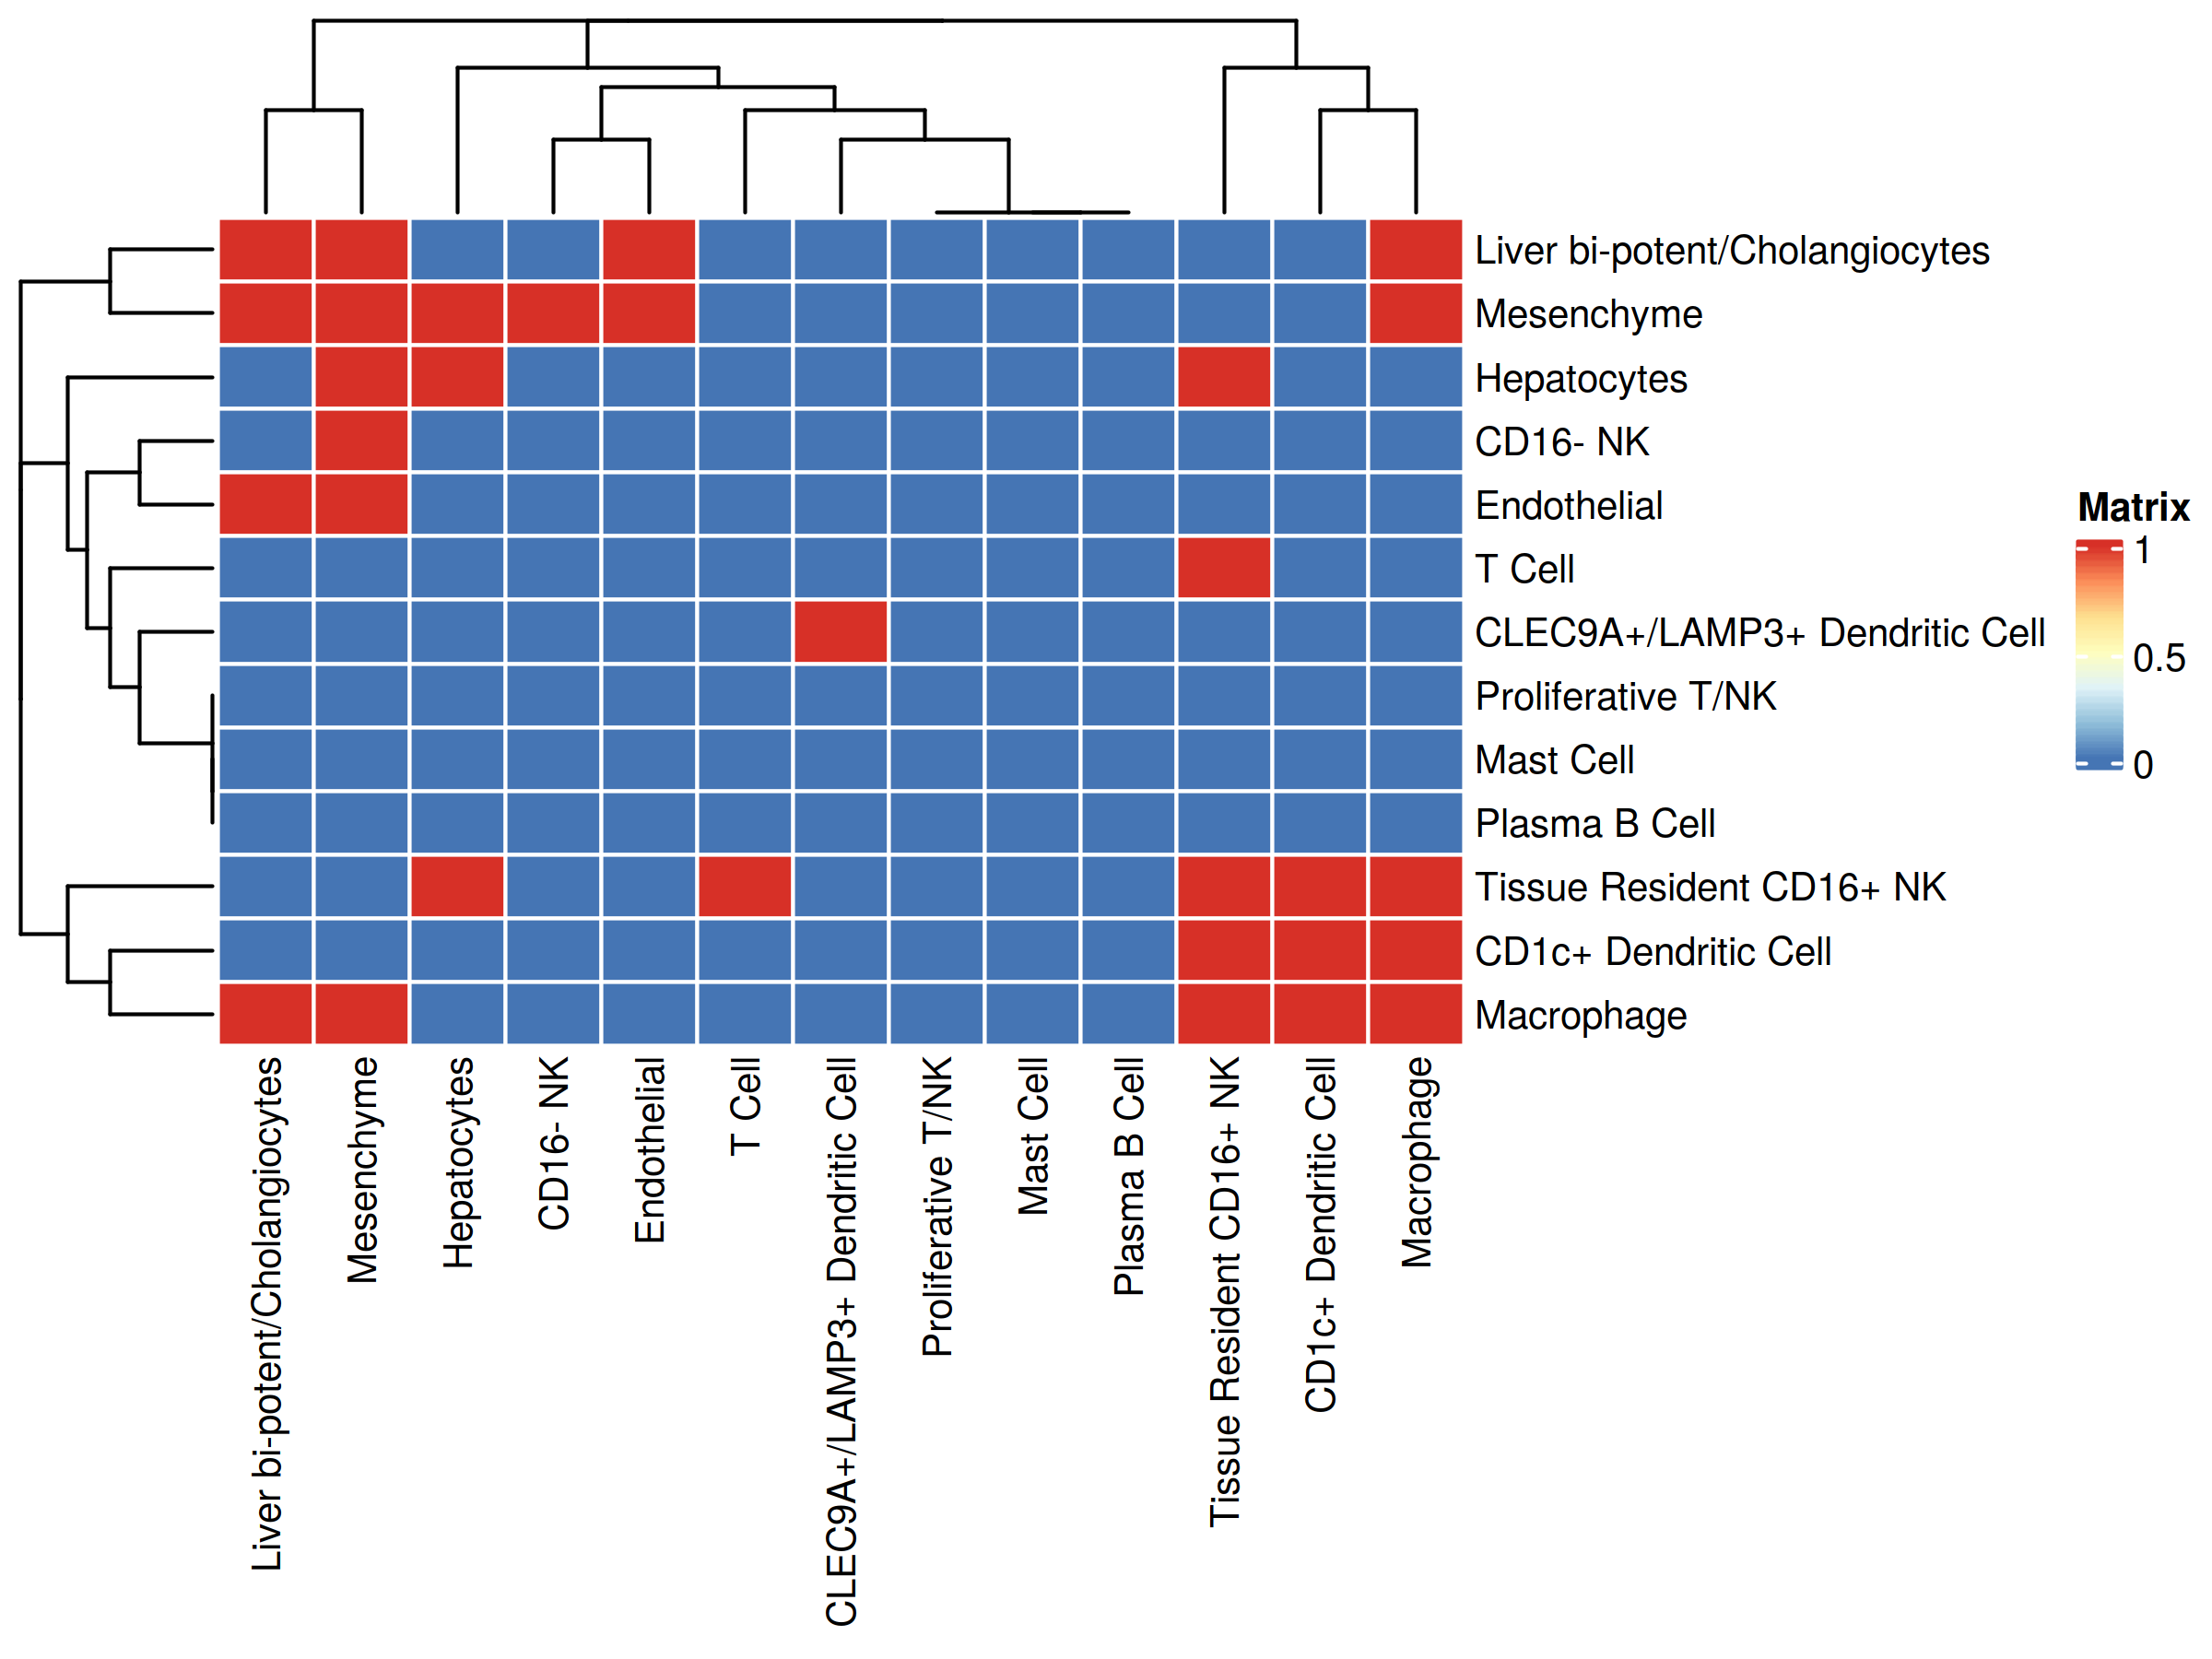

In [11]:
qvalue_gr_tumor <- qvalue_tumor
qvalue_gr_tumor[qvalue_tumor < 0.05] <- 1
qvalue_gr_tumor[qvalue_tumor > 0.05] <- 0
pheatmap(qvalue_gr_tumor, border_color = 'white')

# For Normal

In [48]:
df_normal <- df[df$tissue %in% c("Normal"),]
# Remove blood enriched celltype
df_normal <- df_normal[!(df_normal$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]

## CSOmap signficance based on major cell type

In [51]:
log_info("Start P value")
signif_results = getSignificance(as.matrix(df_normal[,c('x', 'y', 'z')]), labels = df_normal$celltype, k = 3,verbose = T)
log_info("Done")

[2021-07-07 12:15:28] identify topK
[2021-07-07 12:15:28] calculate detailed connections
[2021-07-07 12:15:29] calculate pvalues


## LR contributions based on major cell type

In [52]:
contribution_list = getContribution(TPM[, df_normal$cellName], LR, signif_results$detailed_connections)
LRcontri_normal <- bind_rows(lapply(names(contribution_list), function(clusterPair) {
    scores <- contribution_list[[clusterPair]]
    tibble(clusterPair, 
           LRPair = names(scores),
           scores = scores
          )
}
))

[2021-07-07 12:15:29] Extracting data matrix
[2021-07-07 12:15:29] Calculate contribution of 91 cluster pairs.


Warning message in getContribution(TPM[, df_normal$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in CD16- NK---Mast Cell is lower than 3.
”
Warning message in getContribution(TPM[, df_normal$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in T Cell---Mast Cell is lower than 3.
”
Warning message in getContribution(TPM[, df_normal$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in CD1c+ Dendritic Cell---Mast Cell is lower than 3.
”
Warning message in getContribution(TPM[, df_normal$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in Macrophage---Mast Cell is lower than 3.
”
Warning message in getContribution(TPM[, df_normal$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in CLEC9A+/LAMP3+ Dendritic Cell---Proliferative T/NK is lower than 3.
”
Warning message in getContribution(TPM[, df_normal$cellName], LR, signif_results$detaile

## Write out tumor LR contribution output

In [55]:
readr::write_tsv(LRcontri_normal, "./out/CSOmapR/LR_contribution_normal_majorCellTypes.tsv")

In [53]:
LRcontri_normal %>% group_by(clusterPair) %>% top_n(n =  3, wt = scores) %>% filter(grepl("Mesen", clusterPair))

clusterPair,LRPair,scores
<chr>,<chr>,<dbl>
CD16- NK---Mesenchyme,TIMP1---CD63,0.414707739
CD16- NK---Mesenchyme,CXCL12---CXCR4,0.113659351
CD16- NK---Mesenchyme,HLA-E---KLRC1,0.077154998
T Cell---Mesenchyme,CCL21---CXCR3,0.256386833
T Cell---Mesenchyme,CXCL12---CXCR4,0.150715754
T Cell---Mesenchyme,CCL21---CCR7,0.150519915
CD1c+ Dendritic Cell---Mesenchyme,TIMP1---CD63,0.631447996
CD1c+ Dendritic Cell---Mesenchyme,CXCL12---CXCR4,0.039365415
CD1c+ Dendritic Cell---Mesenchyme,CCL21---CCR7,0.030080381


## Visualize Q value

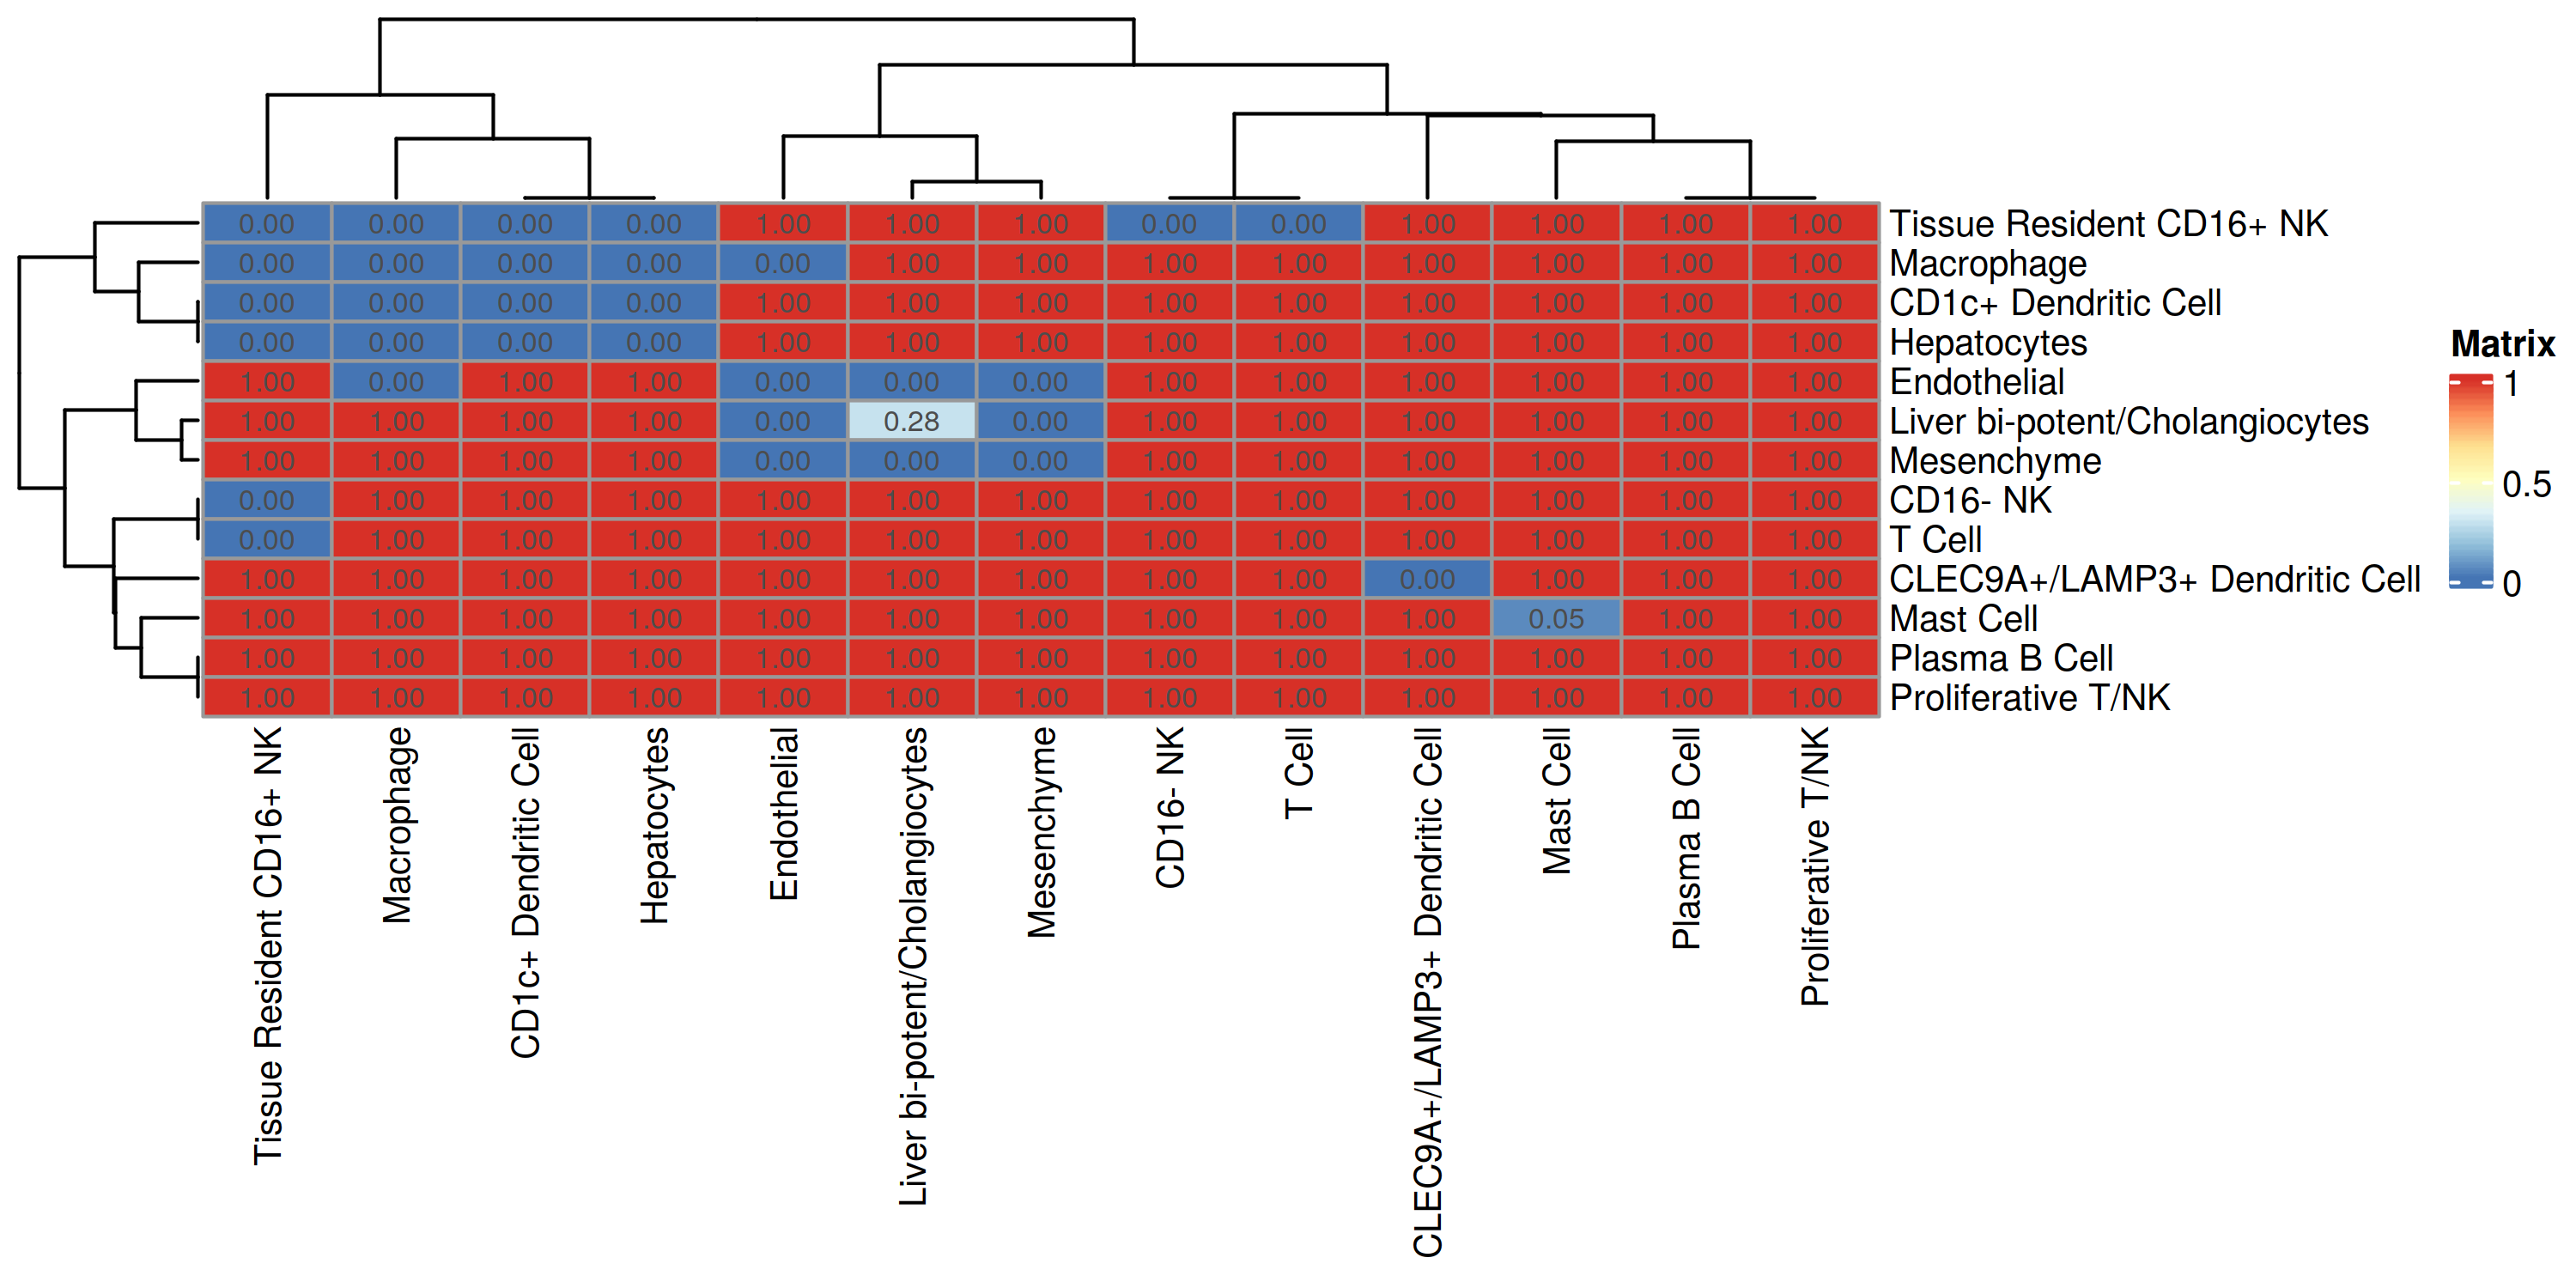

In [16]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
qvalue_normal <- signif_results$qvalue
pheatmap(qvalue_normal, display_numbers = T)

## Binarize q-value

In [18]:
qvalue_gr_normal <- qvalue_normal
qvalue_gr_normal[qvalue_normal < 0.05] <- 1
qvalue_gr_normal[qvalue_normal > 0.05] <- 0

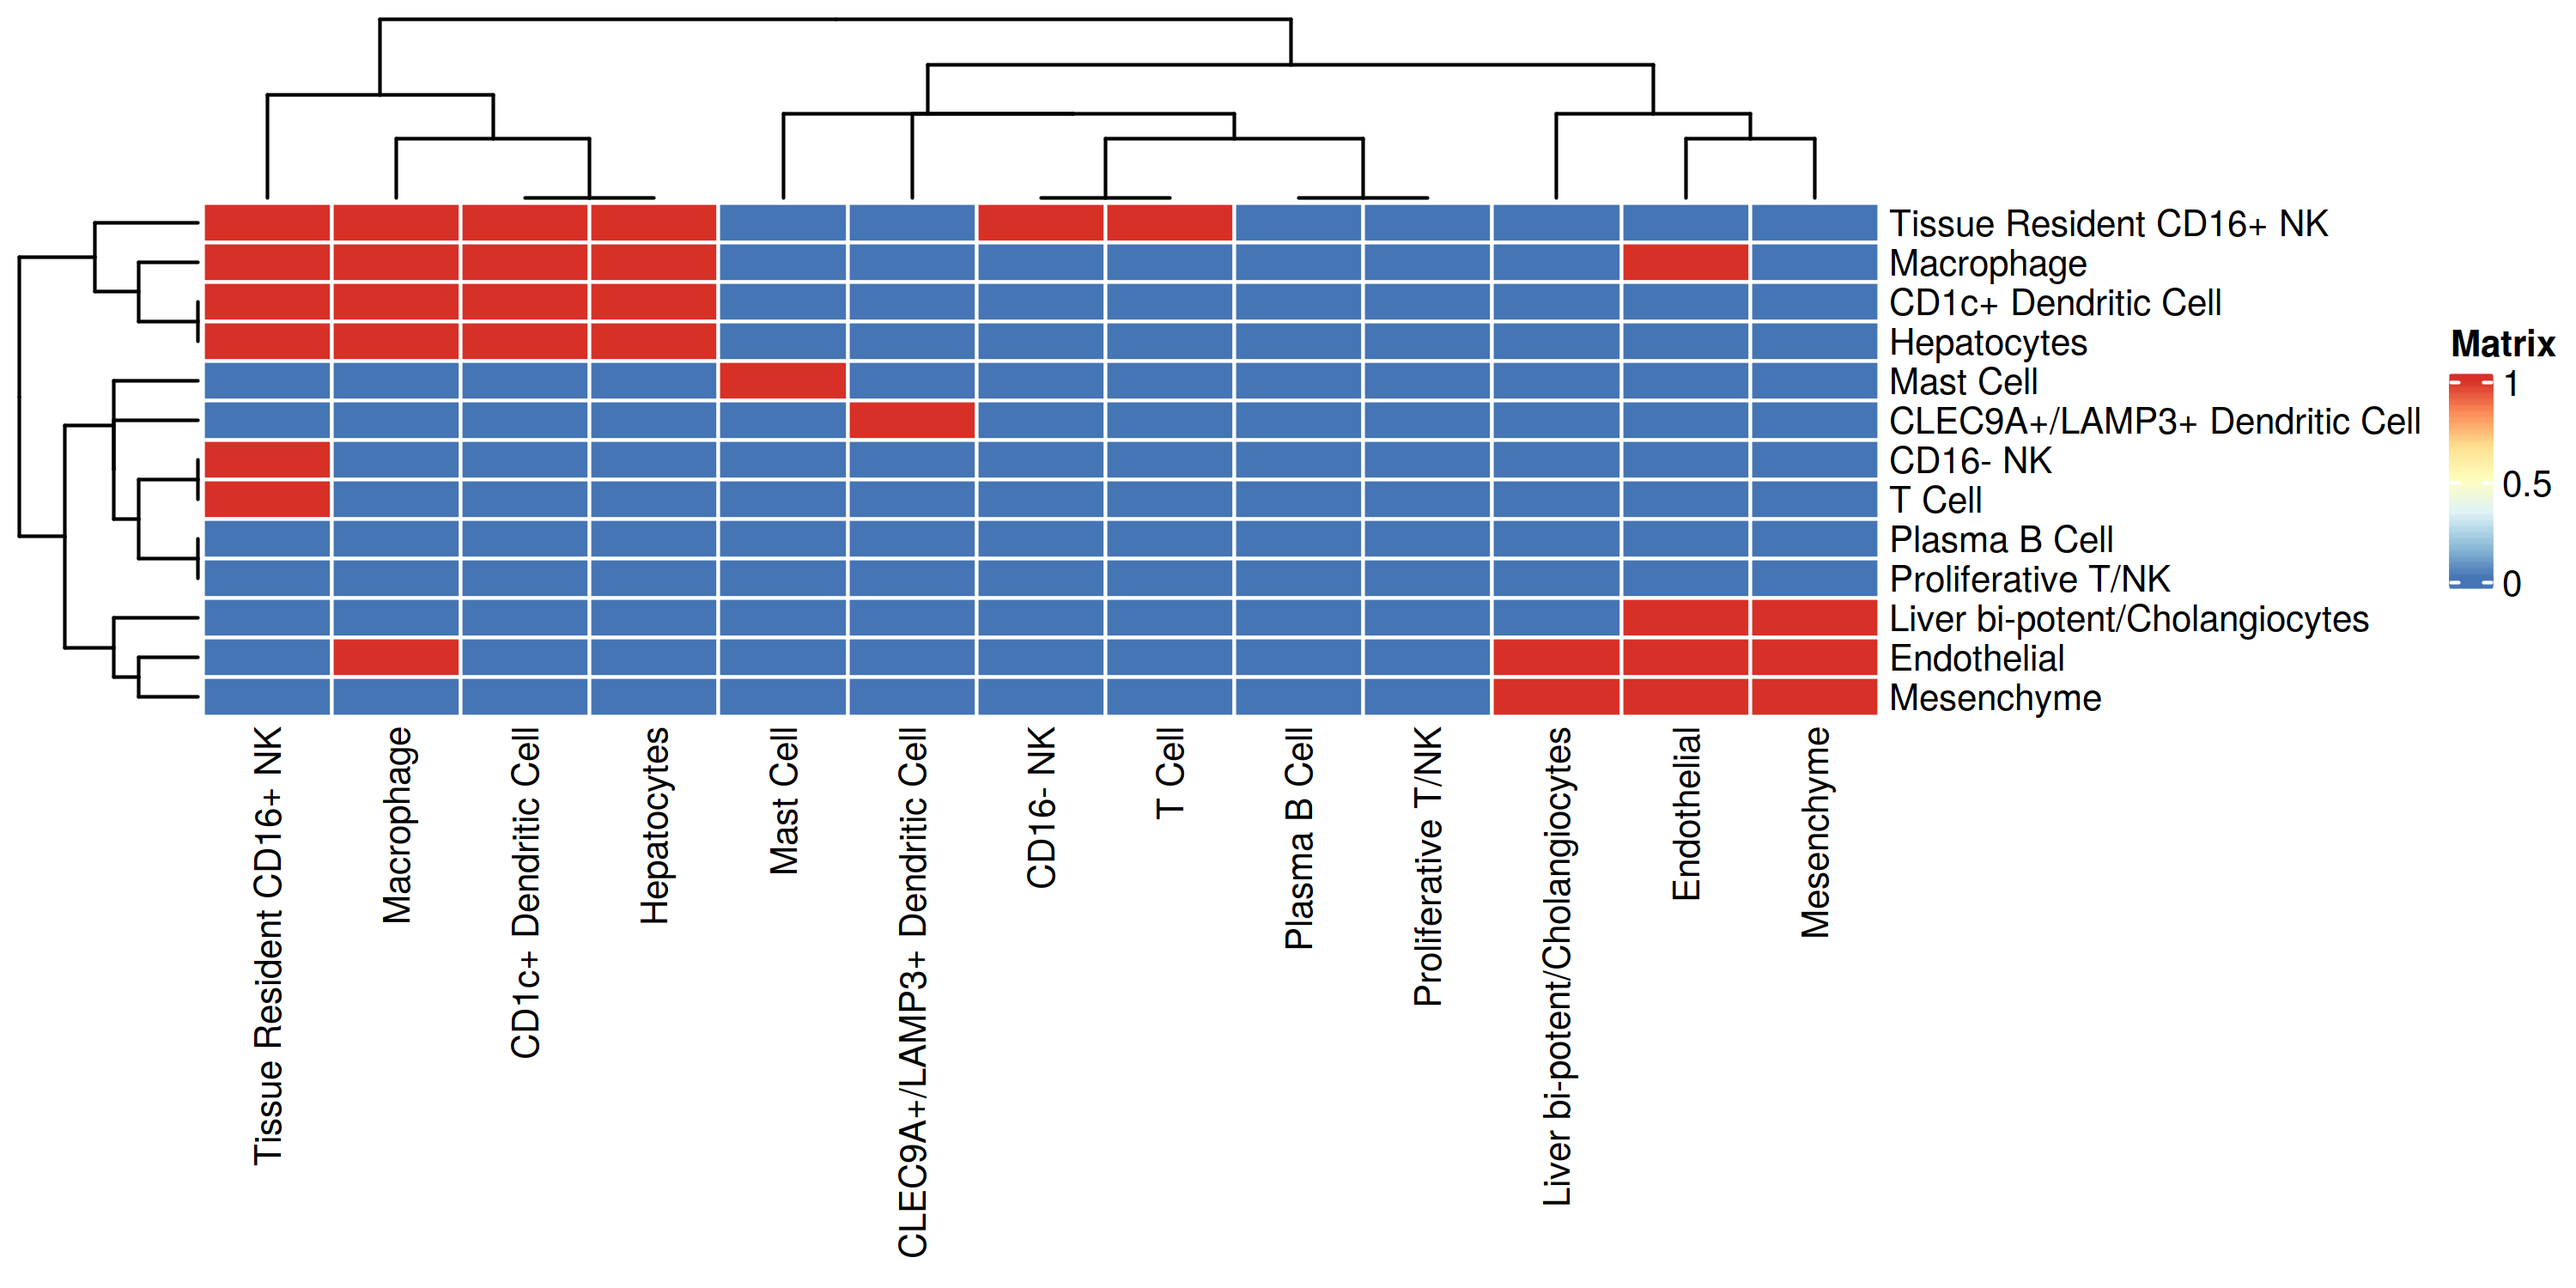

In [19]:
pheatmap(qvalue_gr_normal, border_color = 'white')

In [20]:
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())

# Network visualization

## Merge tumor and normal q-value graph

In [21]:
qvalue_tidy_gr_tumor <- tidygraph::as_tbl_graph(qvalue_gr_tumor, directed = F)
qvalue_tidy_gr_normal <- tidygraph::as_tbl_graph(qvalue_gr_normal, directed = F)

In [23]:
qavalue_tidy_gr_tumor <- qvalue_tidy_gr_tumor %>% 
    activate(nodes) %>% 
    mutate(graph = 'Tumor') %>% 
    activate(edges) %>% 
    mutate(EgdeClass = 'Tumor')

In [24]:
qavalue_tidy_gr_normal <- qvalue_tidy_gr_normal %>% 
    activate(nodes) %>% 
    mutate(graph = 'Normal') %>% 
    activate(edges) %>% 
    mutate(EgdeClass = 'Normal') 

In [28]:
aa <- graph_join(qavalue_tidy_gr_tumor, qavalue_tidy_gr_normal, by = 'name')  %>% activate(nodes) %>%  left_join(cell_count_df, by = c("name" = "celltype")) 

## Save out rds object 

In [29]:
saveRDS(aa, file = "./out/CSOmap_qvalue_tidygraph.rds")

## Annotating node colors

In [26]:
aa <- aa %>% activate(nodes) %>% 
    mutate(Highlight = case_when(
                    grepl("Hepa", name) ~ 'Epithelial',
                    grepl("Mes", name) ~ 'Fibroblast',
                    TRUE ~ 'Other'))

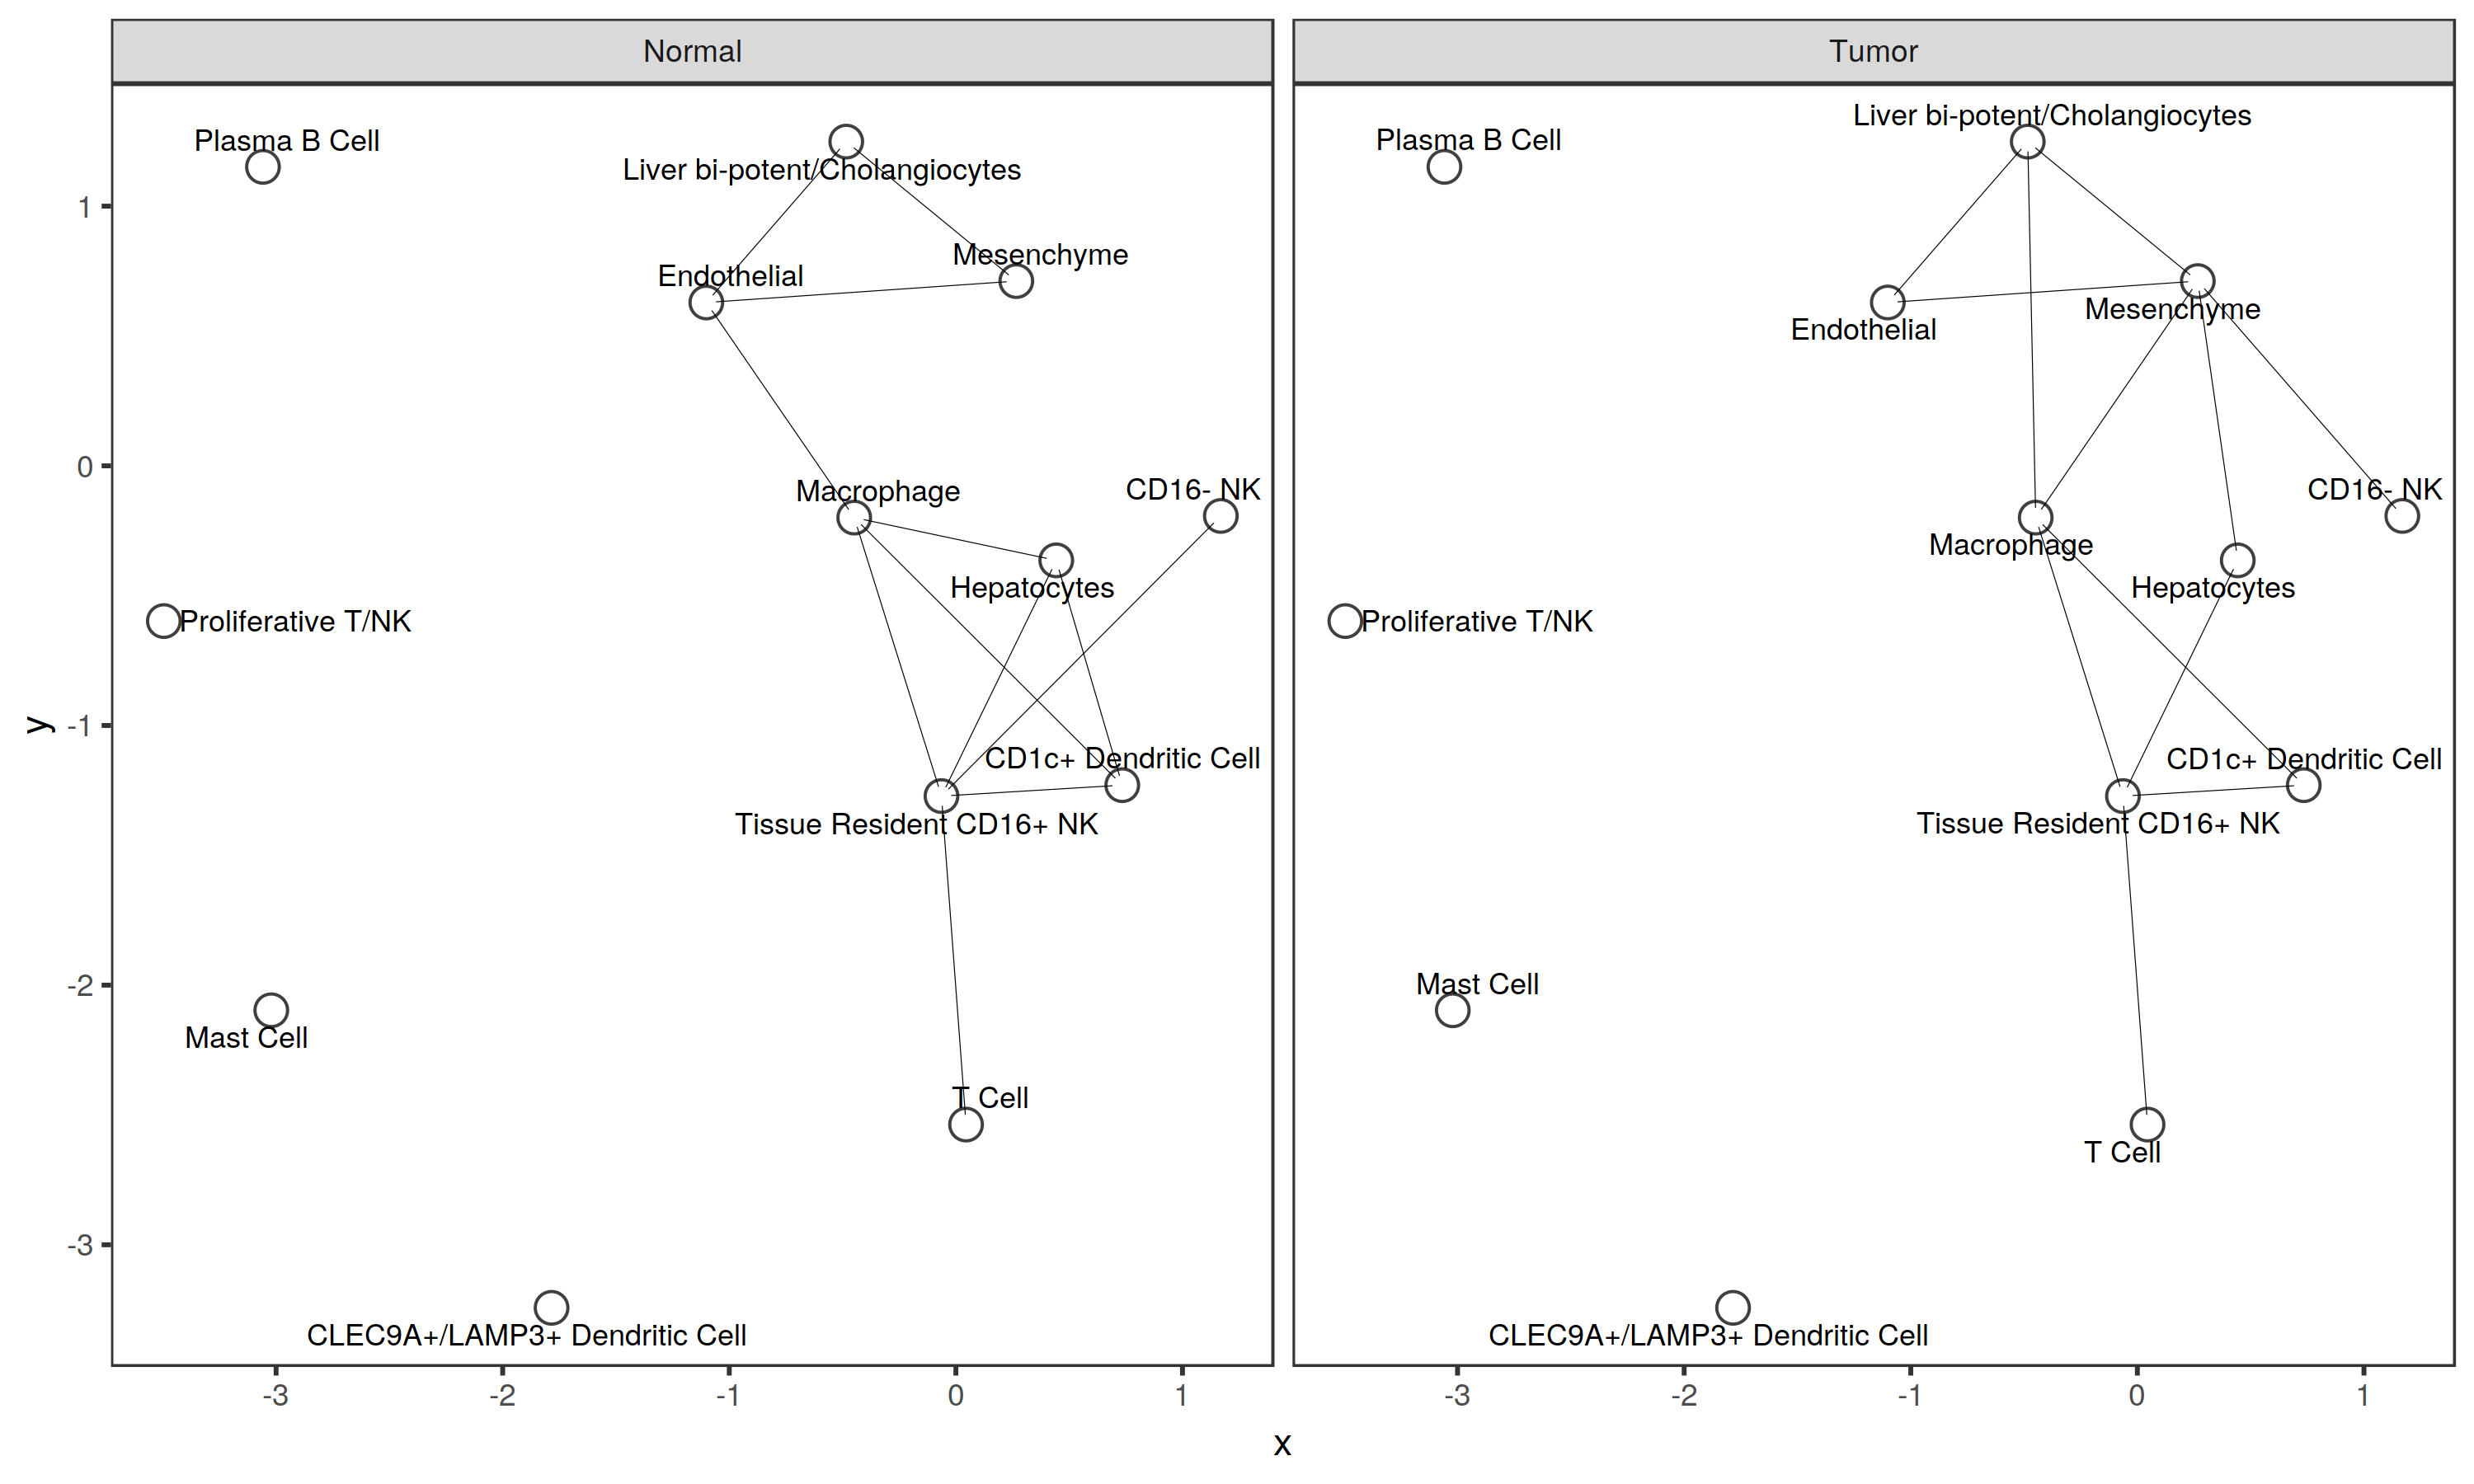

In [71]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)

ggraph(aa,layout = 'kk', maxiter = 1000) +
    geom_edge_fan(aes(),edge_width = .1, alpha = 1, show.legend = T, end_cap = circle(1, 'mm'), start_cap = circle(1, 'mm')) + 
    #geom_edge_density(aes(fill = EgdeClass)) + 
    #geom_edge_loop(aes(colour = EgdeClass)) +
    geom_node_point( aes(), color = 'black', shape = 21, alpha = .75, size = 4) + 
    ggraph::geom_node_text(aes(label = name),  repel = T, size = 3) + 
    
    facet_edges( ~EgdeClass ) + 
    #ggraph::scale_edge_color_brewer(palette = "Pastel2") + 
    ggraph::scale_edge_linetype_manual(values = c('Tumor' = 1, 'Normal' = 5)) + 
    scale_shape_manual(values = c("Other" = 21, "Fibroblast" = 23, "Epithelial" = 24)) + 
    scale_fill_manual(values = c("Other" = "white", "Fibroblast" = 'red', "Epithelial" = "darkblue")) + 
    scale_color_manual(values = c("Other" = "black", "Fibroblast" = 'red', "Epithelial" = "darkblue")) + 

   # ggthemes::scale_fill_tableau("Tableau 20") + 
   # ggthemes::scale_color_tableau("Tableau 20") +
    guides(fill = guide_none(), color = guide_none()) + 
    theme_bw() + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.title = element_blank(), legend.position = 'top') 

# Pertubate TIMP1 

In [58]:
tpmdata['TIMP1',] <- 0

In [59]:
dim(tpmdata)

[1] 60682  9017

## Run CSOmapR

In [60]:
affinityMat = getAffinityMat(tpmdata, LR, verbose = T)
log_info("TSNE step")

coords_res = runExactTSNE_R(
  X = affinityMat,
  no_dims = 3,
  max_iter = 1000,
  verbose = T
)

coords = coords_res$Y
rownames(coords) <- colnames(TPM)
colnames(coords) <- c('x', 'y', 'z')
coords_tbl = bind_cols(cellName = rownames(coords), as.data.frame(coords))



[2021-07-07 15:49:34] Extracting affinity matrix
[2021-07-07 15:49:35] Extracting coordinates affinity matrix
[2021-07-07 15:49:37] Denoising ...
[2021-07-07 15:49:52] Now calculating exact TSNE
Wrapper started
Read the 9017 x 9017 data matrix successfully!
Using current time as random seed...
Randomly initializing the solution.
Y[0] = -0.000026
Similarities loaded 
Learning embedding...
Running iterations: 1000
Iteration 50 (50 iterations in 104.84 seconds), cost 4.864052
Iteration 100 (50 iterations in 104.69 seconds), cost 4.864052
Iteration 150 (50 iterations in 104.51 seconds), cost 4.864052
Iteration 200 (50 iterations in 104.65 seconds), cost 4.864052
Iteration 250 (50 iterations in 105.37 seconds), cost 4.864052
Iteration 300 (50 iterations in 105.70 seconds), cost 4.864050
Iteration 350 (50 iterations in 105.62 seconds), cost 4.864034
Iteration 400 (50 iterations in 105.04 seconds), cost 4.863709
Iteration 450 (50 iterations in 109.13 seconds), cost 4.855371
Iteration 500 (50 

In [62]:
readr::write_tsv(coords_tbl, file = "./out/CSOmapR/coordinates_20210610_TIMP1_pertubation.tsv")

In [64]:
coords_tbl <- as.data.frame(coords_tbl)
rownames(coords_tbl) <- coords_tbl$cellName

In [65]:
df <- cbind(coords_tbl[colnames(sce), ] , celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]

## For Tumor

In [67]:
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]

## CSOmap signficance based on major cell type

In [68]:
log_info("Start P value")
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
log_info("Done")

[2021-07-08 09:45:09] identify topK
[2021-07-08 09:45:12] calculate detailed connections
[2021-07-08 09:45:15] calculate pvalues


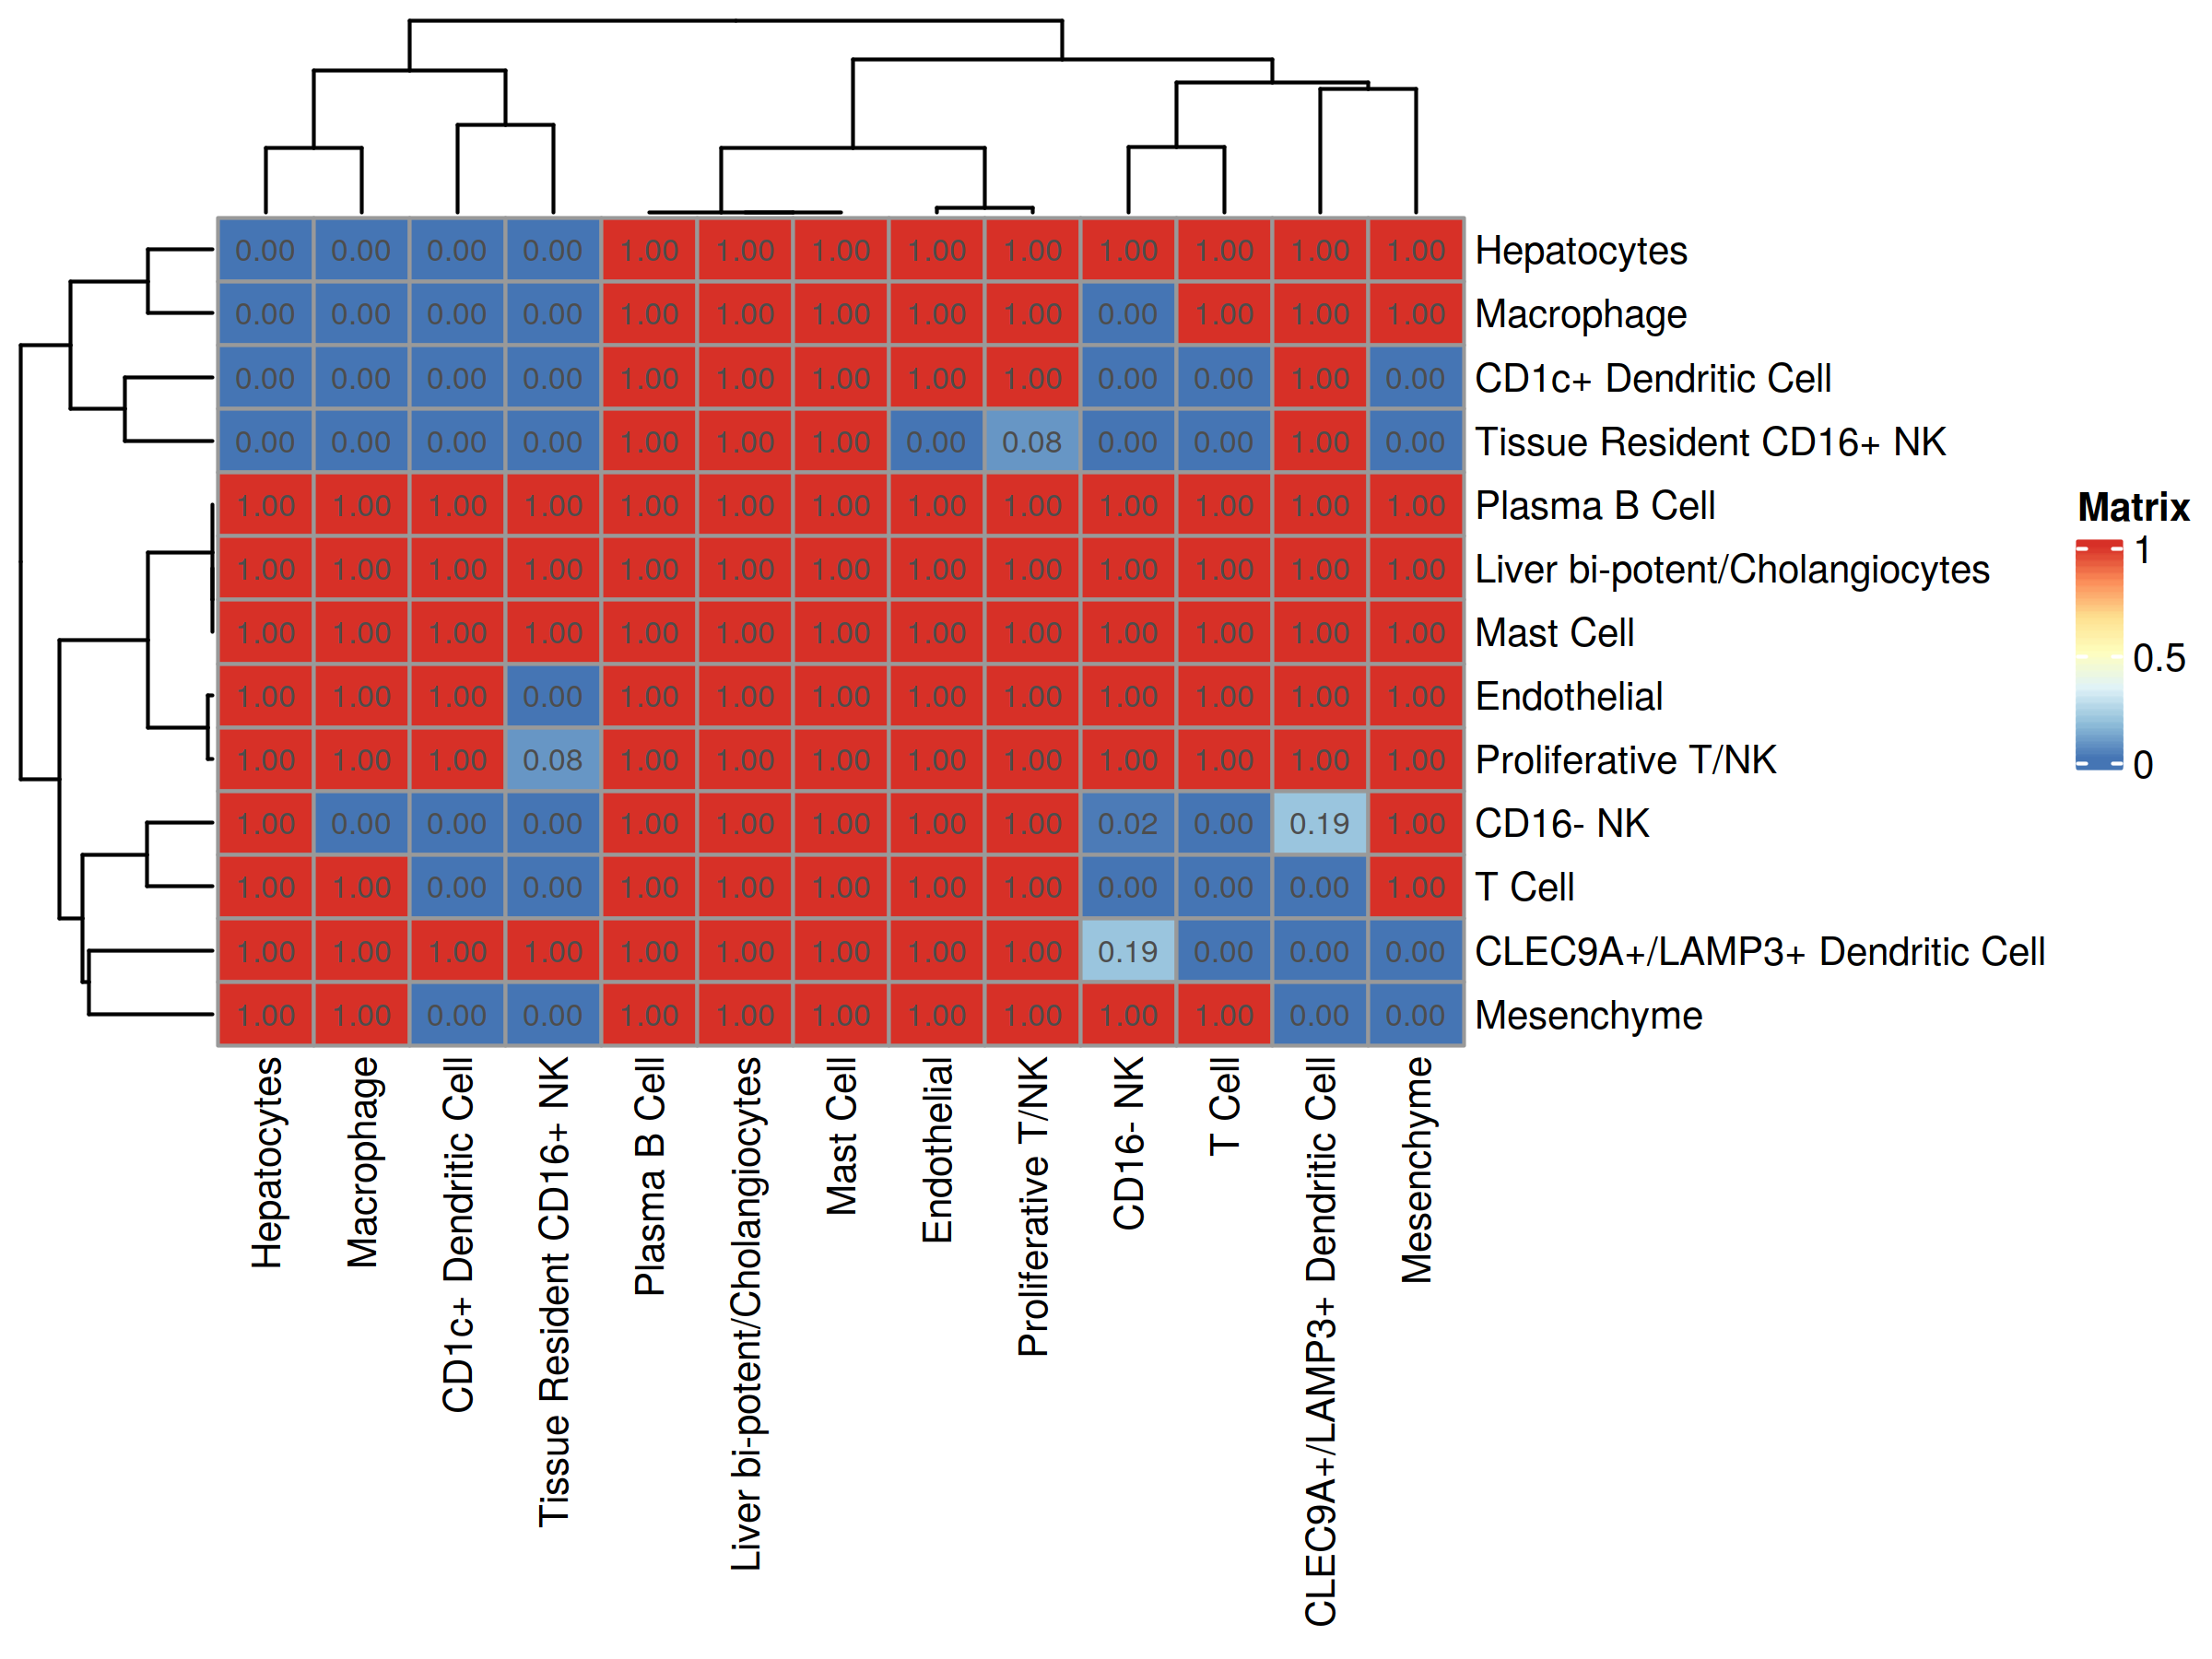

In [69]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
qvalue_tumor <- signif_results$qvalue
pheatmap(qvalue_tumor, display_numbers = T)

## Binarize q-value

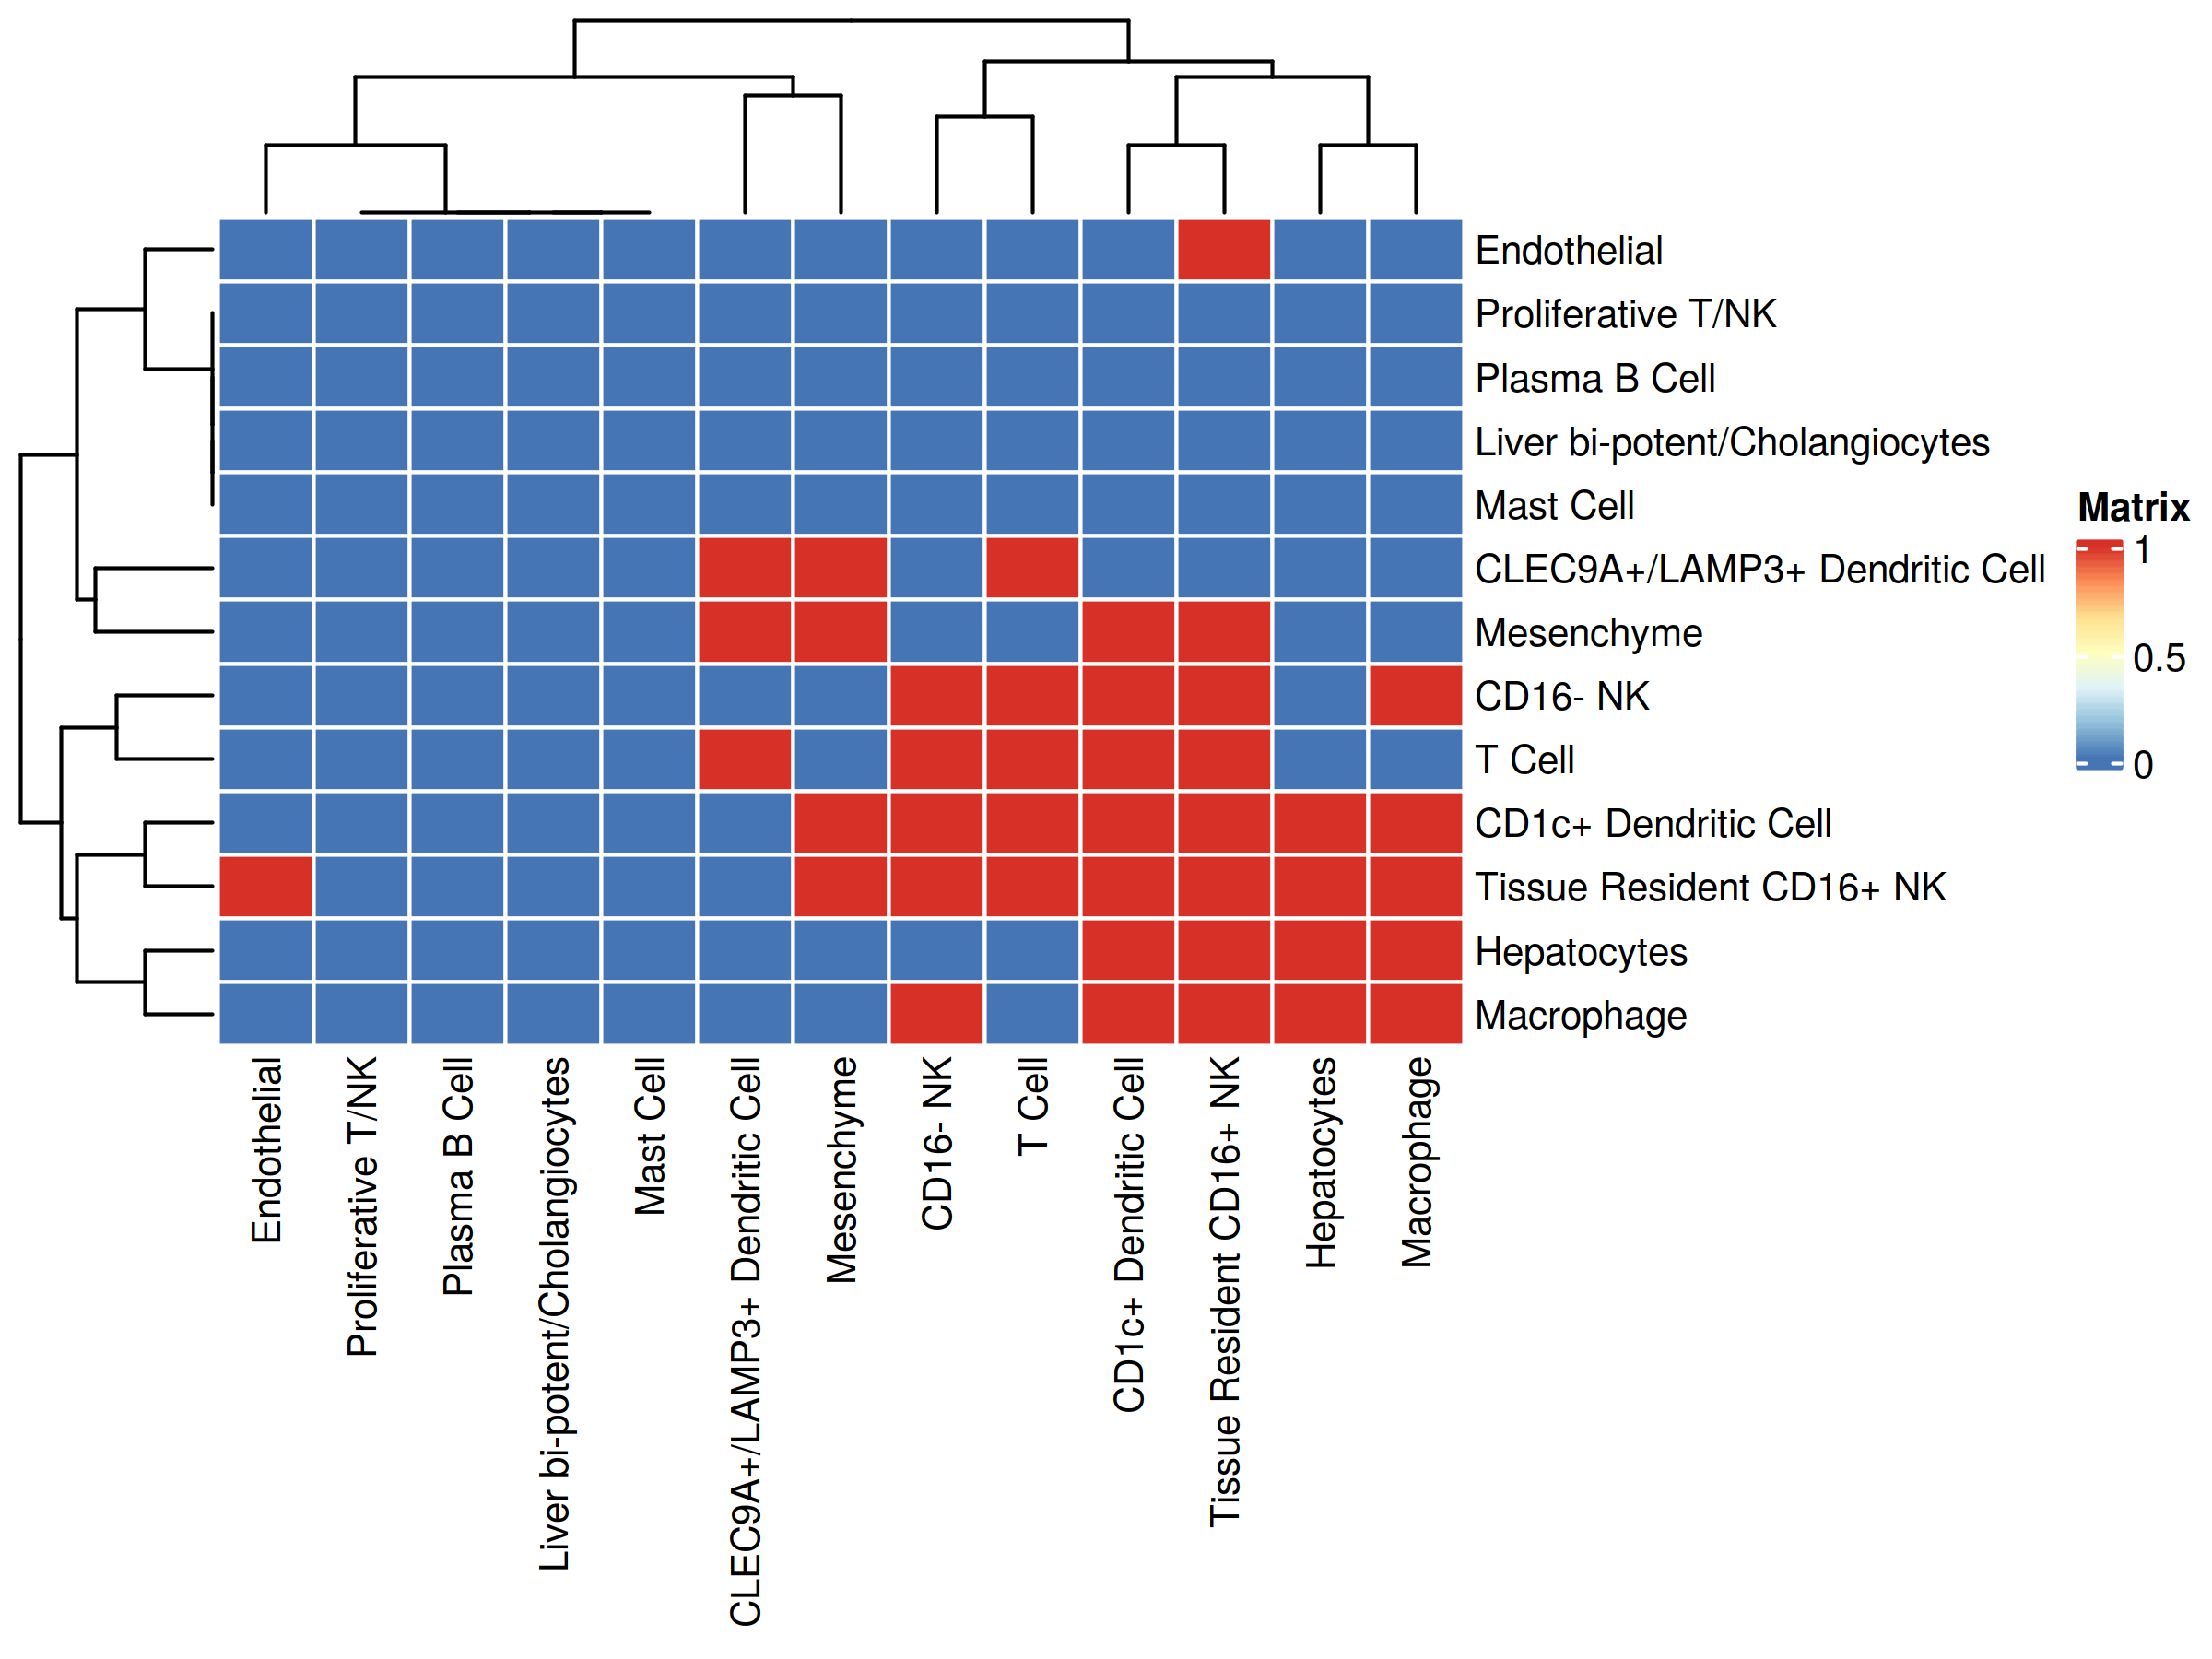

In [70]:
qvalue_gr_tumor <- qvalue_tumor
qvalue_gr_tumor[qvalue_tumor < 0.05] <- 1
qvalue_gr_tumor[qvalue_tumor > 0.05] <- 0
pheatmap(qvalue_gr_tumor, border_color = 'white')

In [71]:
TPM['TIMP1',]

,NL-plus-19-0222,NL-plus-2-0222,NL-plus-22-0222,NL-plus-23-0222,NL-plus-24-0222,NL-plus-25-0222,NL-plus-27-0222,NL-plus-28-0222,NL-plus-29-0222,NL-plus-30-0222,⋯,TP5-86-20180110,TP5-87-20180110,TP5-88-20180110,TP5-89-20180110,TP5-90-20180110,TP5-91-20180110,TP5-9-20180110,TP5-94-20180110,TP5-95-20180110,TP5-96-20180110
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TIMP1,0,0,1.625677,0,0,0,1.215989,0,0,0,⋯,596.9714,446.0953,1088.316,0,2.571292,119.5683,1.777104,0,0,889.2216


In [72]:
contribution_list = getContribution(tpmdata[, df_tumor$cellName], LR, signif_results$detailed_connections)
LRcontri_tumor <- bind_rows(lapply(names(contribution_list), function(clusterPair) {
    scores <- contribution_list[[clusterPair]]
    tibble(clusterPair, 
           LRPair = names(scores),
           scores = scores
          )
}
))

[2021-07-08 09:48:00] Extracting data matrix
[2021-07-08 09:48:00] Calculate contribution of 91 cluster pairs.


Warning message in getContribution(tpmdata[, df_tumor$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in CD16- NK---Liver bi-potent/Cholangiocytes is lower than 3.
”
Warning message in getContribution(tpmdata[, df_tumor$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in Proliferative T/NK---Mast Cell is lower than 3.
”
Warning message in getContribution(tpmdata[, df_tumor$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in Proliferative T/NK---Liver bi-potent/Cholangiocytes is lower than 3.
”
Warning message in getContribution(tpmdata[, df_tumor$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in CD1c+ Dendritic Cell---Mast Cell is lower than 3.
”
Warning message in getContribution(tpmdata[, df_tumor$cellName], LR, signif_results$detailed_connections):
“Number of connected cells in CD1c+ Dendritic Cell---Liver bi-potent/Cholangiocytes is lower than 3.
”
Warning 

In [73]:
LRcontri_tumor %>% group_by(clusterPair) %>% top_n(n =  3, wt = scores) %>% filter(grepl("Mesen", clusterPair))

clusterPair,LRPair,scores
<chr>,<chr>,<dbl>
T Cell---Mesenchyme,HLA-B---CANX,0.10047236
T Cell---Mesenchyme,CCL19---CCR7,0.08016675
T Cell---Mesenchyme,CCL19---CXCR3,0.06842657
Tissue Resident CD16+ NK---Mesenchyme,HLA-B---CANX,0.09048730
Tissue Resident CD16+ NK---Mesenchyme,HLA-C---KIR2DS4,0.08089984
Tissue Resident CD16+ NK---Mesenchyme,HLA-B---KLRD1,0.07744678
CD16- NK---Mesenchyme,HLA-B---CANX,0.09985071
CD16- NK---Mesenchyme,CTGF---ITGB2,0.08498335
CD16- NK---Mesenchyme,CCL19---CXCR3,0.07168496
